In [2]:
#imports all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [5]:
housing_data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


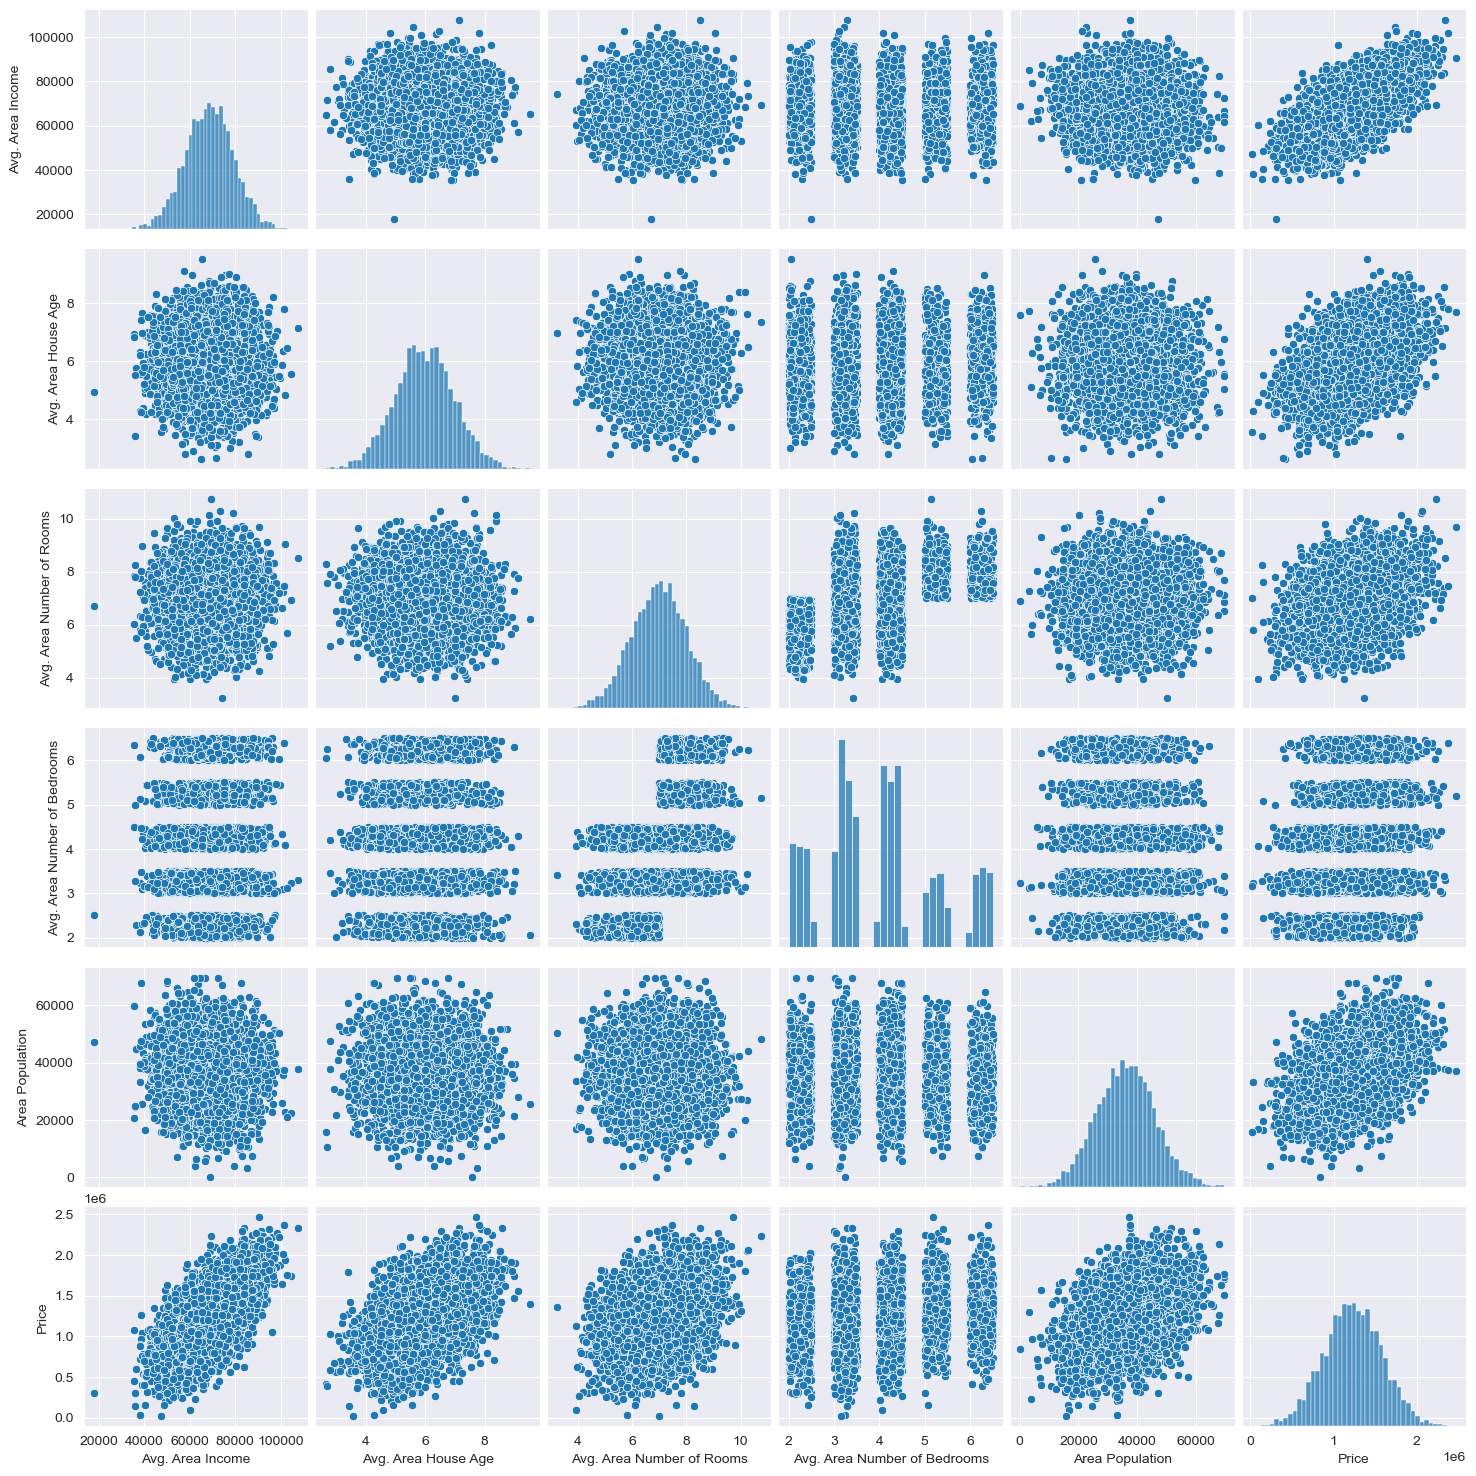

In [7]:
sns.pairplot(housing_data)
plt.show()

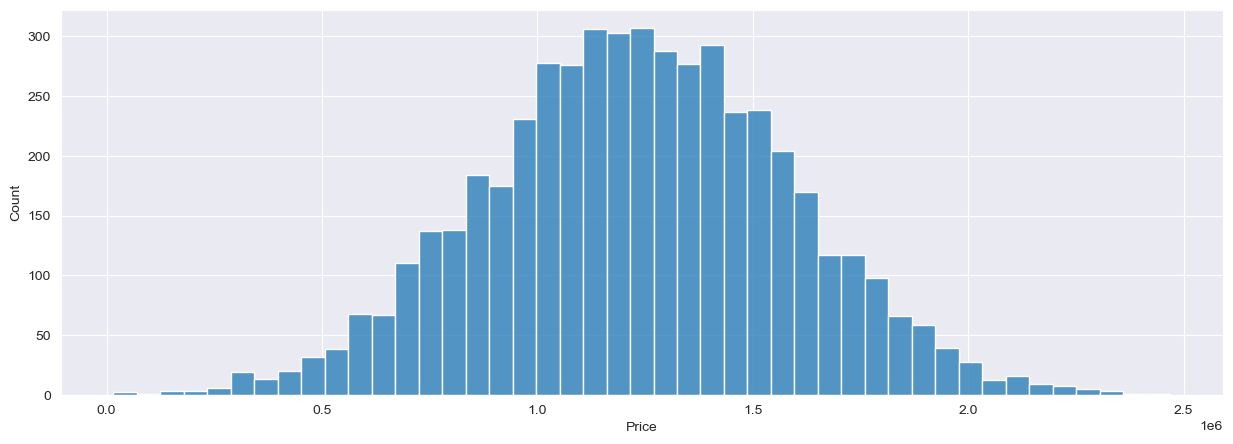

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [8]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

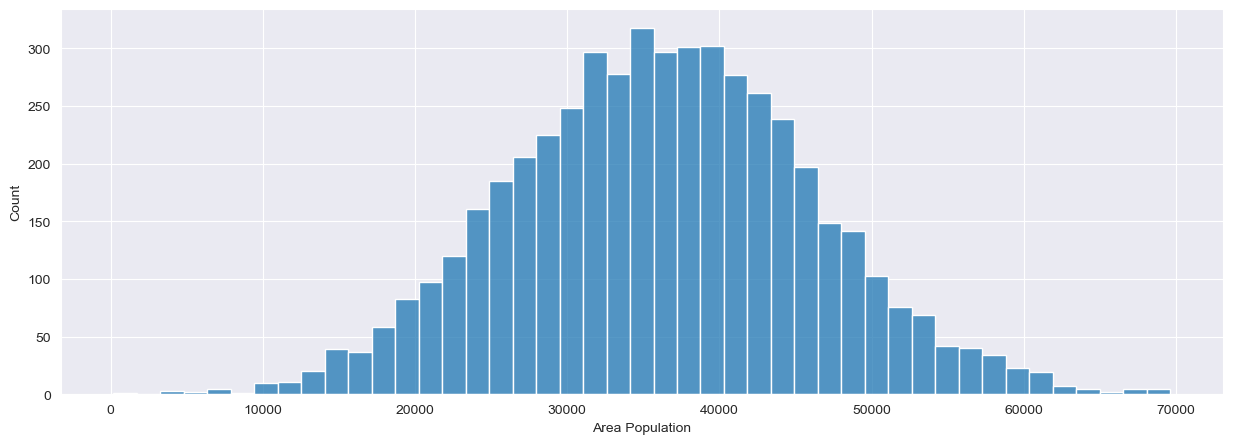

count     5000.000000
mean     36163.516039
std       9925.650114
min        172.610686
25%      29403.928702
50%      36199.406689
75%      42861.290769
max      69621.713378
Name: Area Population, dtype: float64


In [9]:
sns.histplot(housing_data['Area Population'])
plt.show()
print(housing_data['Area Population'].describe())

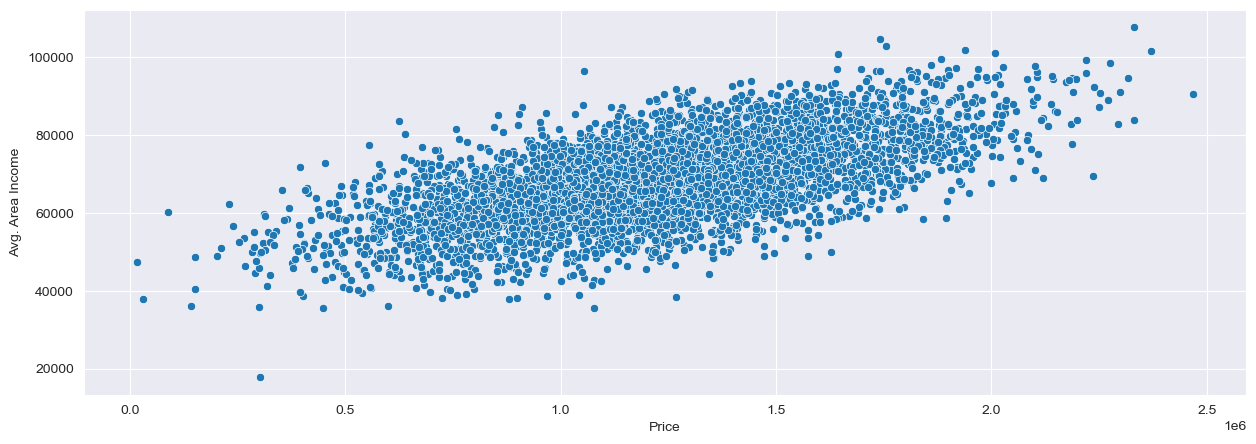

In [10]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

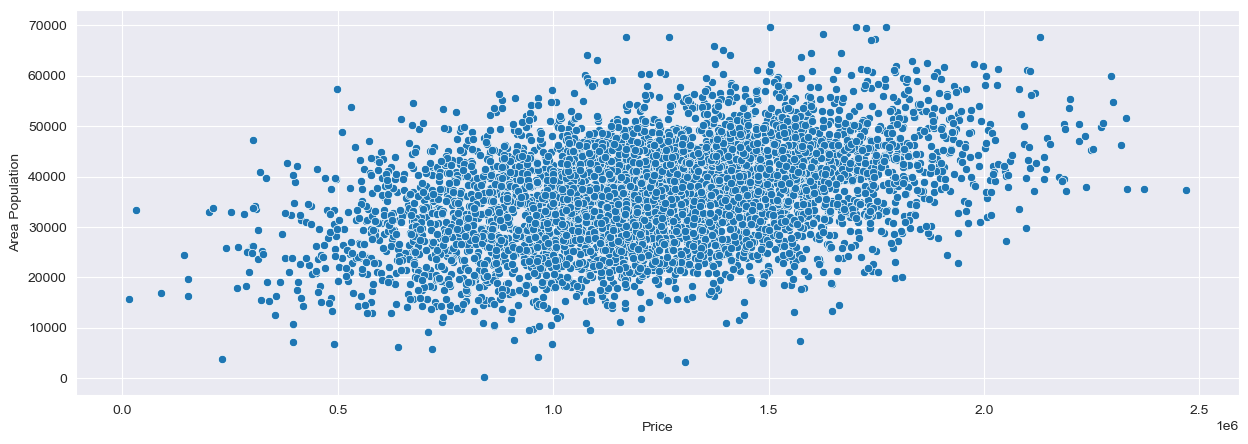

In [11]:
sns.scatterplot(x='Price', y='Area Population', data=housing_data)
plt.show()

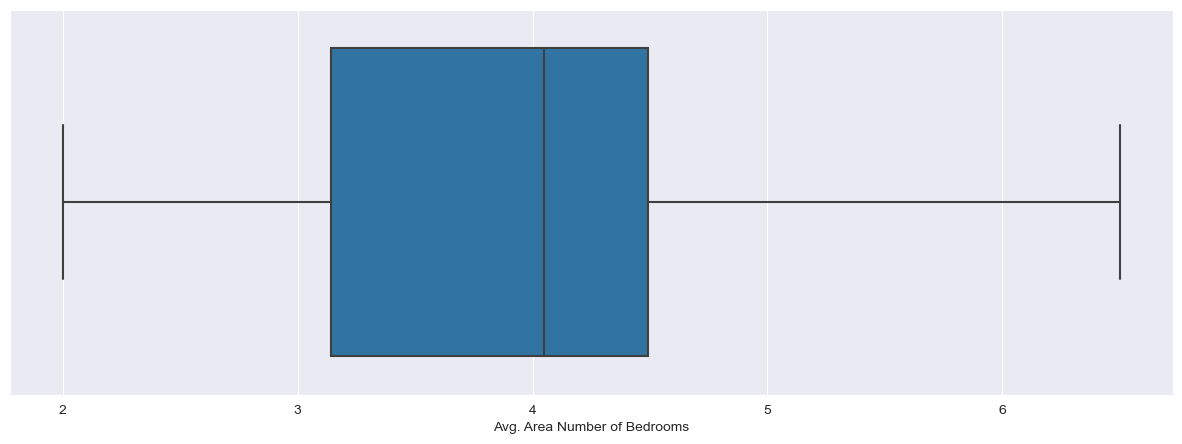

In [12]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

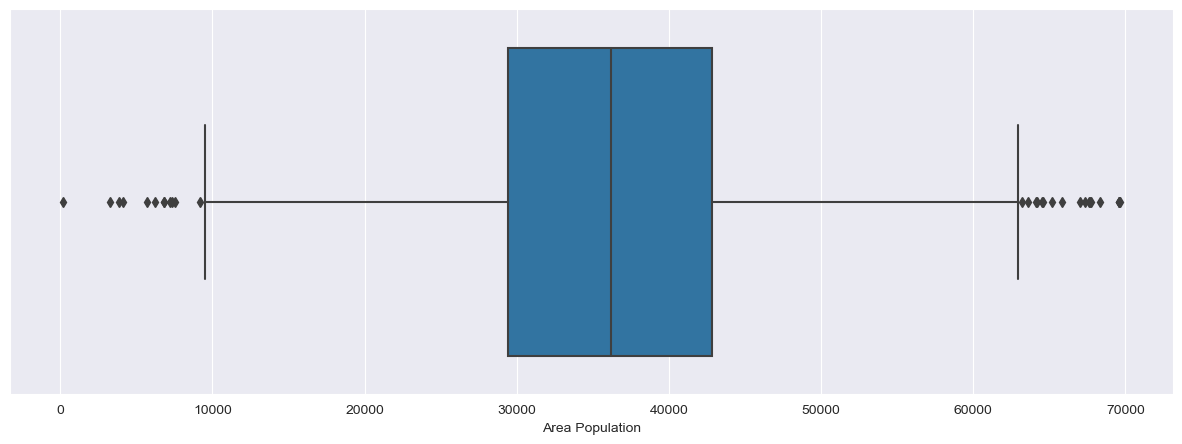

In [13]:
sns.boxplot(x='Area Population', data=housing_data)
plt.show()

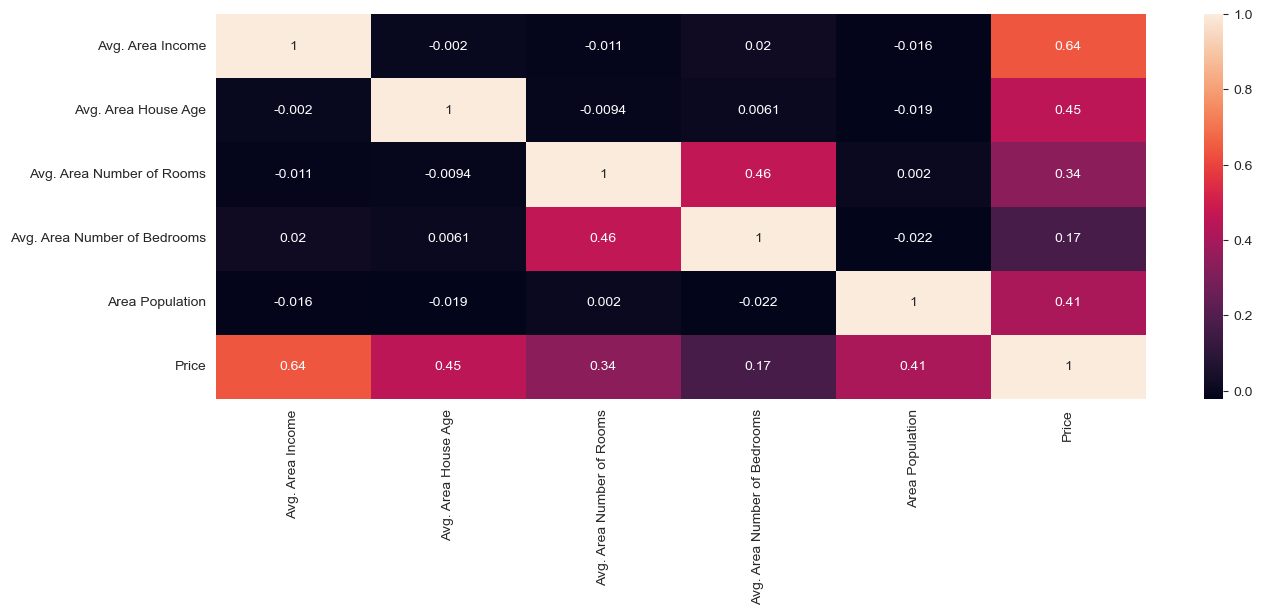

In [14]:
sns.heatmap(housing_data.corr(), annot=True)
plt.show()

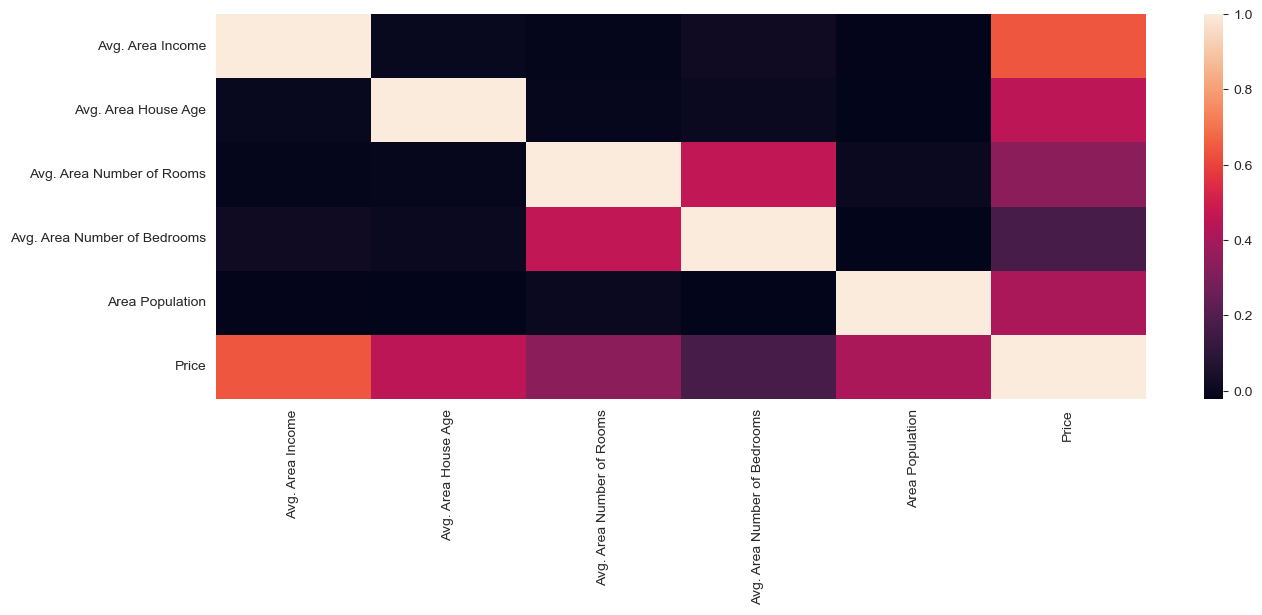

In [15]:
sns.heatmap(housing_data.corr(), annot=False)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
                  'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

# pass our X_test data through the model (lm) to get our predictions
predictions = lm.predict(X_test)

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE: 82879.56381653919
MSE: 10516947079.229603
RMSE: 102552.16759888404
R2 Score:  0.9156589092438958


In [19]:
#uses ridge method
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.05, normalize = True)
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 83778.44611558394
MSE: 10775932056.131088
RMSE: 103807.18691945702
R2 Score:  0.9135819685426866


/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [22]:
#uses ridge method
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.15, normalize = True)
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 90141.3691338801
MSE: 12511338665.003407
RMSE: 111854.09543241323
R2 Score:  0.8996648036853386


/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05, normalize = True)
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 82879.3189877284
MSE: 10516918954.751802
RMSE: 102552.03047600668
R2 Score:  0.9156591347893053


/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.15, normalize = True)
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 82879.01422144435
MSE: 10516881695.506723
RMSE: 102551.8488156441
R2 Score:  0.9156594335913575


/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
